In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def parse_year(year):
    return pd.to_datetime(str(year), format='%Y')

In [139]:
immo_raw_df = pd.read_csv('../data/raw/rawdata.csv', parse_dates=['Build Year'], date_format=parse_year)
immo_raw_df.head()

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Has starting Price,Transaction Subtype,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,False,BUY_REGULAR,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,11149932,Wetteren,9230,2015,3.0,134.0,NaN,APARTMENT,DUPLEX,339000,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,11150061,Ixelles,1050,1958,2.0,134.0,NaN,APARTMENT,APARTMENT,495000,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11153822,BERCHEM,2600,1968,2.0,90.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,11153121,Jette,1090,1965,2.0,80.0,NaN,APARTMENT,APARTMENT,289000,...,False,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
immo_raw_df.describe()

,ID,Postal Code,Facades,Habitable Surface,Land Surface,Price,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Fireplace Count,Terrace Surface,Garden Surface,Living Surface,Consumption Per m2,Cadastral Income,Parking count inside,Parking count outside,Parking box count
count,1.238800e+04,12388.000000,9271.000000,11996.000000,4168.000000,1.238800e+04,12302.000000,10904.000000,9676.000000,12241.000000,4078.000000,2998.000000,8104.000000,2097.000000,6048.000000,7938.000000,12388.000000,3894.000000,4361.000000,0.0
mean,1.099838e+07,4302.356151,2.695610,134.342364,817.716651,4.102685e+05,2.436758,1.300073,1.564283,4.843477,12.058117,-0.836224,19.514931,535.845970,34.988261,244.492479,347.101954,16.783770,7.650997,NaN
std,3.796727e+05,3182.773362,0.835629,154.645256,2595.356915,3.105778e+05,1.361684,0.777219,0.931616,2.704392,22.047361,0.551210,25.758694,2464.292061,54.341791,880.219367,741.985988,566.552584,21.739074,NaN
min,7.309243e+06,1000.000000,1.000000,12.000000,0.000000,3.000000e+04,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-18.000000,0.000000,1.000000,1.000000,NaN
25%,1.101806e+07,1325.000000,2.000000,85.000000,158.000000,2.600000e+05,2.000000,1.000000,1.000000,3.000000,7.000000,-1.000000,9.000000,55.000000,28.000000,84.000000,0.000000,1.000000,1.000000,NaN
50%,1.114095e+07,2960.000000,2.000000,107.000000,325.500000,3.342150e+05,2.000000,1.000000,1.000000,4.000000,10.000000,-1.000000,12.000000,130.000000,32.000000,190.000000,0.000000,1.000000,1.000000,NaN
75%,1.115744e+07,7700.000000,3.000000,156.000000,739.750000,4.500000e+05,3.000000,1.000000,2.000000,6.000000,14.000000,-1.000000,22.000000,355.000000,40.000000,303.000000,530.000000,2.000000,3.000000,NaN
max,1.116304e+07,9990.000000,7.000000,7819.000000,58835.000000,7.650000e+06,25.000000,20.000000,21.000000,61.000000,1317.000000,2.000000,973.000000,80000.000000,4146.000000,43792.000000,9641.000000,25000.000000,155.000000,NaN


In [141]:
immo_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12388 entries, 0 to 12387
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     12388 non-null  int64  
 1   Locality               12388 non-null  object 
 2   Postal Code            12388 non-null  int64  
 3   Build Year             9230 non-null   object 
 4   Facades                9271 non-null   float64
 5   Habitable Surface      11996 non-null  float64
 6   Land Surface           4168 non-null   float64
 7   Type                   12388 non-null  object 
 8   Subtype                12388 non-null  object 
 9   Price                  12388 non-null  int64  
 10  Sale Type              12388 non-null  object 
 11  Bedroom Count          12302 non-null  float64
 12  Bathroom Count         10904 non-null  float64
 13  Toilet Count           9676 non-null   float64
 14  Room Count             12241 non-null  float64
 15  Ki

In [142]:
# Number of observations and columns
immo_raw_df.shape

(12388, 43)

In [143]:
# Changing the bool type to int {True: 1, False: 0}

# Select bool columns
boolean_columns = immo_raw_df.select_dtypes(include=bool).columns

# Apply the lambda function to each element of the Boolean columns.
immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].apply(lambda x: x.map({True: 1, False: 0}))


# Change the data type of columns to int
immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].astype(int)

immo_raw_df

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Has starting Price,Transaction Subtype,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,False,BUY_REGULAR,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,11149932,Wetteren,9230,2015,3.0,134.0,NaN,APARTMENT,DUPLEX,339000,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,11150061,Ixelles,1050,1958,2.0,134.0,NaN,APARTMENT,APARTMENT,495000,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11153822,BERCHEM,2600,1968,2.0,90.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,11153121,Jette,1090,1965,2.0,80.0,NaN,APARTMENT,APARTMENT,289000,...,False,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12383,11162924,Zutendaal,3690,1991,4.0,206.0,1040.0,HOUSE,HOUSE,499000,...,False,BUY_REGULAR,FUELOIL,NaN,True,CONNECTED,NaN,NaN,4.0,NaN
12384,11162921,Gistel,8470,1958,2.0,270.0,923.0,HOUSE,HOUSE,325000,...,False,BUY_REGULAR,GAS,NaN,True,CONNECTED,NaN,1.0,NaN,NaN
12385,11162917,EDEGEM,2650,1951,2.0,69.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12386,11162916,Erps-Kwerps,3071,1991,4.0,390.0,1778.0,HOUSE,VILLA,899000,...,False,BUY_REGULAR,FUELOIL,NaN,True,CONNECTED,NaN,2.0,3.0,NaN


# We have 12388 observations, one target (Price) and 42 features

In [144]:
# Displaying list of Property Types  

immo_raw_df.Type.unique()

array(['APARTMENT', 'HOUSE', 'OFFICE', 'COMMERCIAL', 'LAND', 'GARAGE'],
      dtype=object)

In [145]:
# Getting just APARTMENT AND HOUSE

immo_AP_H =immo_raw_df[immo_raw_df['Type'].isin(['APARTMENT', 'HOUSE'])]
immo_AP_H

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Has starting Price,Transaction Subtype,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,False,BUY_REGULAR,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,11149932,Wetteren,9230,2015,3.0,134.0,NaN,APARTMENT,DUPLEX,339000,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,11150061,Ixelles,1050,1958,2.0,134.0,NaN,APARTMENT,APARTMENT,495000,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11153822,BERCHEM,2600,1968,2.0,90.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,11153121,Jette,1090,1965,2.0,80.0,NaN,APARTMENT,APARTMENT,289000,...,False,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12383,11162924,Zutendaal,3690,1991,4.0,206.0,1040.0,HOUSE,HOUSE,499000,...,False,BUY_REGULAR,FUELOIL,NaN,True,CONNECTED,NaN,NaN,4.0,NaN
12384,11162921,Gistel,8470,1958,2.0,270.0,923.0,HOUSE,HOUSE,325000,...,False,BUY_REGULAR,GAS,NaN,True,CONNECTED,NaN,1.0,NaN,NaN
12385,11162917,EDEGEM,2650,1951,2.0,69.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12386,11162916,Erps-Kwerps,3071,1991,4.0,390.0,1778.0,HOUSE,VILLA,899000,...,False,BUY_REGULAR,FUELOIL,NaN,True,CONNECTED,NaN,2.0,3.0,NaN


In [146]:
# Displaying column names

immo_AP_H.columns

Index(['ID', 'Locality', 'Postal Code', 'Build Year', 'Facades',
       'Habitable Surface', 'Land Surface', 'Type', 'Subtype', 'Price',
       'Sale Type', 'Bedroom Count', 'Bathroom Count', 'Toilet Count',
       'Room Count', 'Kitchen', 'Kitchen Surface', 'Kitchen Type', 'Furnished',
       'Openfire', 'Fireplace Count', 'Terrace', 'Terrace Surface',
       'Terrace Orientation', 'Garden Exists', 'Garden Surface',
       'Garden Orientation', 'Swimming Pool', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'Cadastral Income',
       'Has starting Price', 'Transaction Subtype', 'Heating Type',
       'Is Holiday Property', 'Gas Water Electricity', 'Sewer', 'Sea view',
       'Parking count inside', 'Parking count outside', 'Parking box count'],
      dtype='object')

In [147]:
# Numerical features

immo_AP_H.select_dtypes(include=['int', 'float']).columns

Index(['ID', 'Postal Code', 'Facades', 'Habitable Surface', 'Land Surface',
       'Price', 'Bedroom Count', 'Bathroom Count', 'Toilet Count',
       'Room Count', 'Kitchen', 'Kitchen Surface', 'Furnished', 'Openfire',
       'Fireplace Count', 'Terrace', 'Terrace Surface', 'Garden Exists',
       'Garden Surface', 'Living Surface', 'Consumption Per m2',
       'Cadastral Income', 'Parking count inside', 'Parking count outside',
       'Parking box count'],
      dtype='object')

In [148]:
# Categorical features

immo_AP_H.select_dtypes(include=['object']).columns

Index(['Locality', 'Build Year', 'Type', 'Subtype', 'Sale Type',
       'Kitchen Type', 'Terrace Orientation', 'Garden Orientation',
       'Swimming Pool', 'State of Building', 'EPC', 'Has starting Price',
       'Transaction Subtype', 'Heating Type', 'Is Holiday Property',
       'Gas Water Electricity', 'Sewer', 'Sea view'],
      dtype='object')

### Taking care of Categorical features

### Using One-Hot Encoding for Categorical features
One-Hot Encoding is a data processing technique commonly used in machine learning to handle categorical variables. It consists of converting a categorical column containing different categories into several binary columns (0 or 1), where each column represents a single category. The term "One-Hot" refers to the representation where a single value is coded as "1" (on) and all others are coded as "0" (off).

### Type feature

In [149]:
# Type
immo_AP_H.Type.unique()

array(['APARTMENT', 'HOUSE'], dtype=object)

In [150]:
print(f"Total observations: {immo_AP_H.shape[0]}")
print(f"Total 'Type' missing values: {immo_AP_H['Type'].isnull().sum()}")
print(f"Percentage of 'Type' missing values: {immo_AP_H['Type'].isnull().mean()}")

Total observations: 12302
Total 'Type' missing values: 0
Percentage of 'Type' missing values: 0.0


### One-hot-Encoding for Type feature

In [154]:
# Perform one-hot encoding for the 'Type' column
one_hot_encoded = pd.get_dummies(immo_AP_H['Type'])

# Convert True/False to 1/0
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the original DataFrame with the one-hot-encoded columns
immo_AP_H_encoded = pd.concat([immo_AP_H, one_hot_encoded], axis=1)

# Delete the original 'Type' column
immo_AP_H_encoded.drop(columns=['Type'], inplace=True)

In [155]:
immo_AP_H_encoded

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Subtype,Price,Sale Type,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,APARTMENT,HOUSE
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,220000,NORMAL_SALE,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1,0
1,11149932,Wetteren,9230,2015,3.0,134.0,NaN,DUPLEX,339000,NORMAL_SALE,...,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,0
2,11150061,Ixelles,1050,1958,2.0,134.0,NaN,APARTMENT,495000,NORMAL_SALE,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,11153822,BERCHEM,2600,1968,2.0,90.0,NaN,APARTMENT,175000,NORMAL_SALE,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,0
4,11153121,Jette,1090,1965,2.0,80.0,NaN,APARTMENT,289000,NORMAL_SALE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12383,11162924,Zutendaal,3690,1991,4.0,206.0,1040.0,HOUSE,499000,NORMAL_SALE,...,FUELOIL,NaN,True,CONNECTED,NaN,NaN,4.0,NaN,0,1
12384,11162921,Gistel,8470,1958,2.0,270.0,923.0,HOUSE,325000,NORMAL_SALE,...,GAS,NaN,True,CONNECTED,NaN,1.0,NaN,NaN,0,1
12385,11162917,EDEGEM,2650,1951,2.0,69.0,NaN,APARTMENT,175000,NORMAL_SALE,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
12386,11162916,Erps-Kwerps,3071,1991,4.0,390.0,1778.0,VILLA,899000,NORMAL_SALE,...,FUELOIL,NaN,True,CONNECTED,NaN,2.0,3.0,NaN,0,1


In [157]:
print(f"Apartment Counts: {immo_AP_H_encoded.APARTMENT.value_counts()[1]}")
print(f"Apartment Counts: {immo_AP_H_encoded.HOUSE.value_counts()[1]}")

Apartment Counts: 8219
Apartment Counts: 4083


### Subtype feature

In [158]:
# Subtype

immo_AP_H_encoded.Subtype.unique()

array(['APARTMENT', 'DUPLEX', 'PENTHOUSE', 'FLAT_STUDIO', 'GROUND_FLOOR',
       'HOUSE', 'VILLA', 'CHALET', 'MIXED_USE_BUILDING',
       'COUNTRY_COTTAGE', 'MANSION', 'APARTMENT_BLOCK', 'BUNGALOW',
       'TOWN_HOUSE', 'LOFT', 'MANOR_HOUSE', 'EXCEPTIONAL_PROPERTY', 'KOT',
       'TRIPLEX', 'SERVICE_FLAT', 'FARMHOUSE', 'OTHER_PROPERTY', 'CASTLE'],
      dtype=object)

In [159]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'Subtype' missing values: {immo_AP_H_encoded['Subtype'].isnull().sum()}")
print(f"Percentage of 'Subtype' missing values: {immo_AP_H_encoded['Subtype'].isnull().mean()}")

Total observations: 12302
Total 'Subtype' missing values: 0
Percentage of 'Subtype' missing values: 0.0


### One-hot-Encoding for Subtype feature

In [160]:
# Perform one-hot encoding for the 'Subtype' column
one_hot_encoded = pd.get_dummies(immo_AP_H_encoded['Subtype'])

# Convert True/False to 1/0
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the original DataFrame with the one-hot-encoded columns
immo_AP_H_encoded = pd.concat([immo_AP_H_encoded, one_hot_encoded], axis=1)

# Delete the original 'Subtype' column
immo_AP_H_encoded.drop(columns=['Subtype'], inplace=True)

immo_AP_H_encoded

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Price,Sale Type,Bedroom Count,...,LOFT,MANOR_HOUSE,MANSION,MIXED_USE_BUILDING,OTHER_PROPERTY,PENTHOUSE,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,220000,NORMAL_SALE,3.0,...,0,0,0,0,0,0,0,0,0,0
1,11149932,Wetteren,9230,2015,3.0,134.0,NaN,339000,NORMAL_SALE,3.0,...,0,0,0,0,0,0,0,0,0,0
2,11150061,Ixelles,1050,1958,2.0,134.0,NaN,495000,NORMAL_SALE,2.0,...,0,0,0,0,0,0,0,0,0,0
3,11153822,BERCHEM,2600,1968,2.0,90.0,NaN,175000,NORMAL_SALE,2.0,...,0,0,0,0,0,0,0,0,0,0
4,11153121,Jette,1090,1965,2.0,80.0,NaN,289000,NORMAL_SALE,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12383,11162924,Zutendaal,3690,1991,4.0,206.0,1040.0,499000,NORMAL_SALE,5.0,...,0,0,0,0,0,0,0,0,0,0
12384,11162921,Gistel,8470,1958,2.0,270.0,923.0,325000,NORMAL_SALE,5.0,...,0,0,0,0,0,0,0,0,0,0
12385,11162917,EDEGEM,2650,1951,2.0,69.0,NaN,175000,NORMAL_SALE,1.0,...,0,0,0,0,0,0,0,0,0,0
12386,11162916,Erps-Kwerps,3071,1991,4.0,390.0,1778.0,899000,NORMAL_SALE,5.0,...,0,0,0,0,0,0,0,0,0,1


### Swimming pool feature

In [162]:
# Swimming Pool

immo_AP_H_encoded['Swimming Pool'].unique()

array([False, nan, True], dtype=object)

In [163]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'Swimming Pool' missing values: {immo_AP_H_encoded['Swimming Pool'].isnull().sum()}")
print(f"Percentage of 'Swimming Pool' missing values: {immo_AP_H_encoded['Swimming Pool'].isnull().mean()}")

Total observations: 12302
Total 'Swimming Pool' missing values: 7278
Percentage of 'Swimming Pool' missing values: 0.5916111201430662


<font color='red'><h3>We don't take 'Swimming Pool' as a relevant feature because there are more than 50% of missing values.<h3></font>

### State of Building feature

In [164]:
# State of Building

immo_AP_H_encoded['State of Building'].unique()

array(['GOOD', 'AS_NEW', 'TO_RENOVATE', nan, 'TO_BE_DONE_UP',
       'JUST_RENOVATED', 'TO_RESTORE'], dtype=object)

In [165]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'State of Building' missing values: {immo_AP_H_encoded['State of Building'].isnull().sum()}")
print(f"Percentage of 'State of Building' missing values: {immo_AP_H_encoded['State of Building'].isnull().mean()}")

Total observations: 12302
Total 'State of Building' missing values: 4193
Percentage of 'State of Building' missing values: 0.3408388879856934


In [169]:
# EPC

immo_AP_H_encoded.EPC.unique()

array(['C', 'B', 'D', 'G', 'F', nan, 'A', 'E', 'A+', 'A++'], dtype=object)

In [170]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'State of Building' missing values: {immo_AP_H_encoded.EPC.isnull().sum()}")
print(f"Percentage of 'State of Building' missing values: {immo_AP_H_encoded.EPC.isnull().mean()}")

Total observations: 12302
Total 'State of Building' missing values: 4077
Percentage of 'State of Building' missing values: 0.33140952690619413


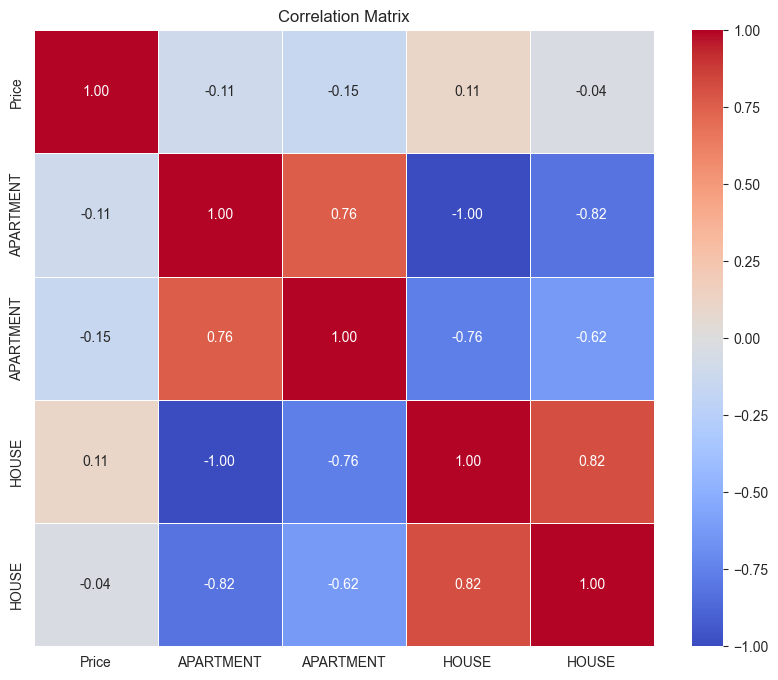

In [167]:
# correlation_matrix = immo_AP_H[immo_AP_H.select_dtypes(include=['int', 'float']).columns].corr()
correlation_matrix = immo_AP_H_encoded[['Price', 'APARTMENT', 'HOUSE']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# I don't take 'Kitchen' because if 'Kitchen Surface' is 0 is because the property doesn't have 'Kitchen'
# I don't take 'Openfire' because if 'Openfire Count' is 0 is because the property doesn't have 'Openfire'

interest_columns = ['Price', 'Postal Code', 'Build Year', 'Facades', 'Habitable Surface', 'Land Surface', 'Type', 'Subtype', 'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Surface', 'Kitchen Type', 'Furnished', 'Fireplace Count', 'Terrace', 'Terrace Surface', 'Garden Surface', 'Swimming Pool', 'State of Building', 'Living Surface']